## Final Project Submission

Please fill out:
* Student name: Eunita Nyengo
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: Noah Kandie, William Okomba and Diana Mong'ina
* Blog post URL:


# Introduction

Microsoft wants to enter the movie business by opening a new movie studio, but they lack the necessary experience and experise in the movie industry. 

It needs to be aware of the kinds of movies that are currently doing well at the box office in order to make movies that appeal to viewers and generate revenue as a result.

I am conducting research and analyzing data on **box office performance**, **audience demographics**, and **critical reception**, and I hope to gain insights into trends in **genres**, **themes**, and **audience appeal**. Using the  gained insights, I shall share my findings and recommendations to guide their decision-making when it comes to creating and marketing movies that resonates with the target audience.

Microsoft's new movie studio may improve their chances of producing quality films by concentrating on developing captivating stories and characters, emphasizing diversity and representation, and being adaptable to changes in the business.

# Data Collection Sources

1. BoxOffice
2. IMDB
3. Wrotten Tomatoe
4. MOvieDB


# Objectives

1. Investigate and analyse the current film industry trends
2. Understand the audience demographic and critical genres
3. Deliver actionable insights to Microsft for decision making

# Exploarative Data Analysis

## 1. Importing the datasets

In [165]:
# We will start by importing the provided data set into our environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## 2. Loading the datasets

In [90]:
# We will open and inspect our data

df_bom = pd.read_csv("/home/nick/Desktop/Phase1_Project/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv")
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
df_info = pd.read_csv("/home/nick/Desktop/Phase1_Project/dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv", delimiter ='\t')
df_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [4]:
df_reviews = pd.read_csv("/home/nick/Desktop/Phase1_Project/dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv", delimiter='\t', encoding='latin1')
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [5]:
df_movies = pd.read_csv("/home/nick/Desktop/Phase1_Project/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv")
df_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [6]:
df_budgets = pd.read_csv("/home/nick/Desktop/Phase1_Project/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv")
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# 3. Data Cleaning

   ## 3.1 First dataset : bom_movies_gross

In [7]:
# Understanding the data
df_bom.info()
df_bom.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


(3387, 5)

In [8]:
# Looking for any missing values on df_bom

df_bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing values are in the columns 'studio', 'domestic_gross' and 'foreign_gross' with missing counts of 5, 28 and 1350 respectivley

In [9]:
#  Generating descriptive statistics

df_bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [10]:
# We are now replacing missing values with the mean

df_bom["domestic_gross"].fillna(df_bom["domestic_gross"].mean(), inplace = True)

In [11]:
df_bom['foreign_gross'].fillna(pd.to_numeric(df_bom['foreign_gross'], errors='coerce').mean(), inplace=True)

In [12]:
# We are now replace missing values for column 'studio' by the mode
df_bom = df_bom.fillna(df_bom.mode().iloc[0])

In [13]:
# Re-checking for any missing values after replacement

df_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
# Checking for duplicates from df_bom
df_bom.duplicated().value_counts()

False    3387
dtype: int64

In [15]:
#Rechecking the summary 
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [16]:
# Convert columns to numeric values
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'], errors='coerce')
df_bom['domestic_gross'] = pd.to_numeric(df_bom['domestic_gross'], errors='coerce')

# Adding total gross column
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']
df_bom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010,9.603000e+08
3,Inception,WB,292600000.0,5.357000e+08,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018,7.506324e+07
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018,7.506184e+07
3384,El Pacto,Sony,2500.0,7.505704e+07,2018,7.505954e+07
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018,7.505944e+07


In [17]:
# Rechecking dataset
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


## 3.2 Second Data Set: rt_movie_info

In [18]:
# Understanding the data
df_info.info()
df_info.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


(1560, 12)

In [19]:
# Checking for missing value
df_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Missing values are in the columns 'director, 'writer', 'theater_date', 'dvd_date', 'runtime' and 'studio' with missing counts of 41, 67, 6, 6, 2 and 35 respectivley

In [20]:
# Droping some rows with missing values
# Dropping currency, box office and studio

df_info = df_info.drop(['currency','box_office','studio'], axis=1)
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes


In [21]:
# Re_checking for missing value
df_info.isnull().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
dvd_date        359
runtime          30
dtype: int64

<AxesSubplot:>

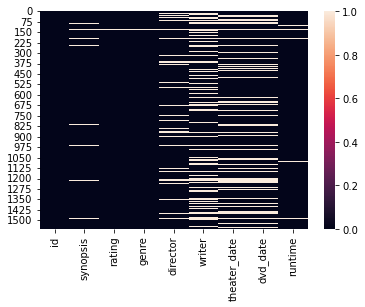

In [22]:
# Visualising the missing values
sns.heatmap(df_info.isnull())

In [23]:
# We are now replacing missing values with the mean

df_info['synopsis'].fillna(pd.to_numeric(df_info['synopsis'], errors='coerce').mean(), inplace=True)
df_info['genre'].fillna(pd.to_numeric(df_info['genre'], errors='coerce').mean(), inplace=True)
df_info['director'].fillna(pd.to_numeric(df_info['director'], errors='coerce').mean(), inplace=True)
df_info['writer'].fillna(pd.to_numeric(df_info['writer'], errors='coerce').mean(), inplace=True)
df_info['theater_date'].fillna(pd.to_numeric(df_info['theater_date'], errors='coerce').mean(), inplace=True)
df_info['runtime'].fillna(pd.to_numeric(df_info['runtime'], errors='coerce').mean(), inplace=True)

In [24]:
# Checking for duplicates 
df_info.duplicated().value_counts()

False    1560
dtype: int64

This dataset had no duplicates

In [25]:
#  Generating descriptive statistics from df_bom
df_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [26]:
# Rechecking dataset
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes


In [27]:
#  Generating descriptive statistics

df_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


## 3.3 Third dataset: rt_reviews

In [28]:
# Understanding the data
df_reviews.info()
df_reviews.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


(54432, 8)

In [29]:
# Looking for any missing values

df_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Missing values are in the columns 'review', 'rating', 'critic' and 'publisher' with missing counts of 5563, 13517, 2722 and 309 respectivley

<AxesSubplot:>

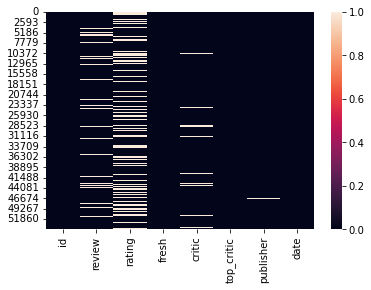

In [30]:
# Visualising the missing values
sns.heatmap(df_reviews.isnull())

In [31]:
#  Generating descriptive statistics from df_bom

df_reviews.describe()

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [32]:
#Adding year column in the df_info table from df_bom table
col_extracted = df_movies["original_title"]
display(col_extracted)

0        Harry Potter and the Deathly Hallows: Part 1
1                            How to Train Your Dragon
2                                          Iron Man 2
3                                           Toy Story
4                                           Inception
                             ...                     
26512                           Laboratory Conditions
26513                                 _EXHIBIT_84xxx_
26514                                    The Last One
26515                                    Trailer Made
26516                                      The Church
Name: original_title, Length: 26517, dtype: object

In [33]:
# We are now replacing missing values with the mean
# Picked rating since it's the most affected
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')
df_reviews['rating'].fillna(df_reviews['rating'].mean(), inplace=True)

In [34]:
#Rechecking dataset
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,5.135733,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,5.135733,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,5.135733,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,5.135733,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,5.135733,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [35]:
# Droping some rows with missing values
# Dropping review, top_critic and studio

df_reviews = df_reviews.drop(['review','top_critic',], axis=1)
df_reviews.head()

,id,rating,fresh,critic,publisher,date
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018"
1,3,5.135733,rotten,Annalee Newitz,io9.com,"May 23, 2018"
2,3,5.135733,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018"
3,3,5.135733,fresh,Daniel Kasman,MUBI,"November 16, 2017"
4,3,5.135733,fresh,NaN,Cinema Scope,"October 12, 2017"


I am going to disregard this data set and use the other 4 in my analysis. 

Reason for ignoring is that I realised the ID columns are duplicated which could mean that each ID is tied to a specific movie title. I am not skilled enough to merge that data with the other data sets. 

## 3.4 Fourth datasets: tmbd_movies

In [36]:
df_movies = df_reviews.join(col_extracted)
display(df_movies)

,id,rating,fresh,critic,publisher,date,original_title
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1
1,3,5.135733,rotten,Annalee Newitz,io9.com,"May 23, 2018",How to Train Your Dragon
2,3,5.135733,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018",Iron Man 2
3,3,5.135733,fresh,Daniel Kasman,MUBI,"November 16, 2017",Toy Story
4,3,5.135733,fresh,NaN,Cinema Scope,"October 12, 2017",Inception
...,...,...,...,...,...,...,...
54427,2000,5.135733,fresh,Laura Sinagra,Village Voice,"September 24, 2002",NaN
54428,2000,5.135733,rotten,Michael Szymanski,Zap2it.com,"September 21, 2005",NaN
54429,2000,5.135733,rotten,Emanuel Levy,EmanuelLevy.Com,"July 17, 2005",NaN
54430,2000,5.135733,rotten,Christopher Null,Filmcritic.com,"September 7, 2003",NaN


In [37]:
# Understanding the data
df_movies.info()
df_movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              54432 non-null  int64  
 1   rating          54432 non-null  float64
 2   fresh           54432 non-null  object 
 3   critic          51710 non-null  object 
 4   publisher       54123 non-null  object 
 5   date            54432 non-null  object 
 6   original_title  26517 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ MB


(54432, 7)

In [38]:
# Looking for missing value
df_movies.isnull().sum()

id                    0
rating                0
fresh                 0
critic             2722
publisher           309
date                  0
original_title    27915
dtype: int64

There are no missing values in this dataset

In [39]:
# We will also check for duplicates
df_movies.duplicated().value_counts()

False    54421
True        11
dtype: int64

There are no duplicates either

In [40]:
# Checking dataset
df_movies.head()

,id,rating,fresh,critic,publisher,date,original_title
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1
1,3,5.135733,rotten,Annalee Newitz,io9.com,"May 23, 2018",How to Train Your Dragon
2,3,5.135733,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018",Iron Man 2
3,3,5.135733,fresh,Daniel Kasman,MUBI,"November 16, 2017",Toy Story
4,3,5.135733,fresh,NaN,Cinema Scope,"October 12, 2017",Inception


## 3.5 Fifth dataset: movie_budgets

In [41]:
# Understanding the data
df_budgets.info()
df_budgets.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


(5782, 6)

In [42]:
#  Generating descriptive statistics from df_movies
df_info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [43]:
# Looking for missing value
df_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This data set has no missing value

In [44]:
# We will also check for duplicates
df_budgets.duplicated().value_counts()

False    5782
dtype: int64

This dataset has no duplicates either

In [45]:
# Checking dataset
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Summary of the datasets

1. df_bom = 3387 rows, 6 columns
2. df_info = 1560 rows, 9 columns
3. df_movies = 26517 rows, 10 columns
4. df_budgets = 5782 rows, 6 columns

# Merging the datasets

In [46]:
#

In [47]:
# I'll start by merging df_movies and df_info
merged_data1 =df_movies.merge(df_info, on='id', how='inner')
merged_data1.head(10)

,id,rating_x,fresh,critic,publisher,date,original_title,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
1,3,5.135733,rotten,Annalee Newitz,io9.com,"May 23, 2018",How to Train Your Dragon,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,3,5.135733,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018",Iron Man 2,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
3,3,5.135733,fresh,Daniel Kasman,MUBI,"November 16, 2017",Toy Story,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
4,3,5.135733,fresh,NaN,Cinema Scope,"October 12, 2017",Inception,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
5,3,5.135733,fresh,Michelle Orange,Capital New York,"September 11, 2017",Percy Jackson & the Olympians: The Lightning T...,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
6,3,5.135733,rotten,Eric D. Snider,EricDSnider.com,"July 17, 2013",Avatar,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
7,3,5.135733,rotten,Matt Kelemen,Las Vegas CityLife,"April 21, 2013",Toy Story 3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
8,3,5.135733,fresh,Sean Axmaker,Parallax View,"March 24, 2013",Despicable Me,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
9,3,5.135733,fresh,Kong Rithdee,Bangkok Post,"March 4, 2013",Megamind,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes


In [48]:
merged_data1.info()
df_reviews.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              54432 non-null  int64  
 1   rating_x        54432 non-null  float64
 2   fresh           54432 non-null  object 
 3   critic          51710 non-null  object 
 4   publisher       54123 non-null  object 
 5   date            54432 non-null  object 
 6   original_title  26517 non-null  object 
 7   synopsis        54300 non-null  object 
 8   rating_y        54346 non-null  object 
 9   genre           54345 non-null  object 
 10  director        48992 non-null  object 
 11  writer          45206 non-null  object 
 12  theater_date    53206 non-null  object 
 13  dvd_date        53206 non-null  object 
 14  runtime         53594 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 6.6+ MB


(54432, 6)

In [49]:
# We will also check for duplicates
merged_data1.duplicated().value_counts()

False    54421
True        11
dtype: int64

In [50]:
# Then i'll merge merged_data1 and df_budgets to create merged_data2
merged_data2 = merged_data1.merge(df_budgets, on='id', how='inner')

In [51]:
# Reviewing the new dataset
merged_data2.info()
merged_data2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185046 entries, 0 to 185045
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 185046 non-null  int64  
 1   rating_x           185046 non-null  float64
 2   fresh              185046 non-null  object 
 3   critic             176654 non-null  object 
 4   publisher          184353 non-null  object 
 5   date               185046 non-null  object 
 6   original_title     185046 non-null  object 
 7   synopsis           180058 non-null  object 
 8   rating_y           180058 non-null  object 
 9   genre              180058 non-null  object 
 10  director           144922 non-null  object 
 11  writer             131060 non-null  object 
 12  theater_date       175556 non-null  object 
 13  dvd_date           175556 non-null  object 
 14  runtime            180058 non-null  object 
 15  release_date       185046 non-null  object 
 16  mo

(185046, 20)

In [52]:
merged_data2.head()

,id,rating_x,fresh,critic,publisher,date,original_title,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,runtime,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
1,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,"Nov 21, 2018",Ralph Breaks The Internet,"$175,000,000","$201,091,711","$524,283,695"
2,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,"Apr 8, 2005",Sahara,"$145,000,000","$68,671,925","$121,671,925"
3,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,"Oct 5, 2018",Venom,"$116,000,000","$213,511,408","$853,628,605"
4,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,"Feb 18, 2005",Son of the Mask,"$100,000,000","$17,018,422","$59,918,422"


In [53]:
#Let's rename the "title" column name from the 'df_bom' dataset
df_bom.rename({'title':'movie'}, axis=1, inplace=True)

In [54]:
# Creating the final dataset
# I'll merge merged_data2 and df_bom

movie_data = merged_data2.merge(df_bom, on='movie', how='inner')

In [55]:
# Reviewing the new dataset
movie_data.info()
movie_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38384 entries, 0 to 38383
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38384 non-null  int64  
 1   rating_x           38384 non-null  float64
 2   fresh              38384 non-null  object 
 3   critic             36642 non-null  object 
 4   publisher          38238 non-null  object 
 5   date               38384 non-null  object 
 6   original_title     38384 non-null  object 
 7   synopsis           37008 non-null  object 
 8   rating_y           37008 non-null  object 
 9   genre              37008 non-null  object 
 10  director           30371 non-null  object 
 11  writer             27580 non-null  object 
 12  theater_date       36091 non-null  object 
 13  dvd_date           36091 non-null  object 
 14  runtime            37008 non-null  object 
 15  release_date       38384 non-null  object 
 16  movie              383

(38384, 25)

In [56]:
# Checking dataset
movie_data.head()

,id,rating_x,fresh,critic,publisher,date,original_title,synopsis,rating_y,genre,...,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,total_gross
0,3,5.135733,fresh,PJ Nabarro,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,...,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
1,3,5.135733,rotten,Annalee Newitz,io9.com,"May 23, 2018",How to Train Your Dragon,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,...,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
2,3,5.135733,fresh,Sean Axmaker,Stream on Demand,"January 4, 2018",Iron Man 2,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,...,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
3,3,5.135733,fresh,Daniel Kasman,MUBI,"November 16, 2017",Toy Story,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,...,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
4,3,5.135733,fresh,NaN,Cinema Scope,"October 12, 2017",Inception,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,...,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0


In [57]:
# Looking for missing value
movie_data.isnull().sum()

id                       0
rating_x                 0
fresh                    0
critic                1742
publisher              146
date                     0
original_title           0
synopsis              1376
rating_y              1376
genre                 1376
director              8013
writer               10804
theater_date          2293
dvd_date              2293
runtime               1376
release_date             0
movie                    0
production_budget        0
domestic_gross_x         0
worldwide_gross          0
studio                   0
domestic_gross_y         0
foreign_gross          389
year                     0
total_gross            389
dtype: int64

In [79]:
# Droping all rows with missing values
movie_final = movie_data.drop(['fresh', 'critic', 'synopsis','director','writer', 'theater_date', 'dvd_date', 'runtime',], axis=1)
movie_final

,id,rating_x,publisher,date,original_title,rating_y,genre,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,total_gross
0,3,5.135733,Patrick Nabarro,"November 10, 2018",Harry Potter and the Deathly Hallows: Part 1,R,Drama|Science Fiction and Fantasy,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
1,3,5.135733,io9.com,"May 23, 2018",How to Train Your Dragon,R,Drama|Science Fiction and Fantasy,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
2,3,5.135733,Stream on Demand,"January 4, 2018",Iron Man 2,R,Drama|Science Fiction and Fantasy,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
3,3,5.135733,MUBI,"November 16, 2017",Toy Story,R,Drama|Science Fiction and Fantasy,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
4,3,5.135733,Cinema Scope,"October 12, 2017",Inception,R,Drama|Science Fiction and Fantasy,"May 29, 2015",Aloha,"$37,000,000","$21,052,030","$25,387,091",Sony,21100000.0,5200000.0,2015,26300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38379,99,5.135733,Decent Films Guide,"October 29, 2008",The Collapsed,PG-13,Comedy|Romance,"May 24, 2013",Before Midnight,"$3,000,000","$8,110,621","$23,251,930",SPC,8100000.0,3100000.0,2013,11200000.0
38380,99,5.135733,Movie Mom,"May 3, 2003",A Warrior's Heart,PG-13,Comedy|Romance,"May 24, 2013",Before Midnight,"$3,000,000","$8,110,621","$23,251,930",SPC,8100000.0,3100000.0,2013,11200000.0
38381,99,5.135733,Hollywood.com,"February 17, 2003",Red Faction: Origins,PG-13,Comedy|Romance,"May 24, 2013",Before Midnight,"$3,000,000","$8,110,621","$23,251,930",SPC,8100000.0,3100000.0,2013,11200000.0
38382,99,5.135733,Dark Horizons,"February 9, 2003",Natural Selection,PG-13,Comedy|Romance,"May 24, 2013",Before Midnight,"$3,000,000","$8,110,621","$23,251,930",SPC,8100000.0,3100000.0,2013,11200000.0


In [80]:
# Reviewing the new dataset
movie_final.info()
movie_final.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38384 entries, 0 to 38383
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 38384 non-null  int64  
 1   rating_x           38384 non-null  float64
 2   publisher          38238 non-null  object 
 3   date               38384 non-null  object 
 4   original_title     38384 non-null  object 
 5   rating_y           37008 non-null  object 
 6   genre              37008 non-null  object 
 7   release_date       38384 non-null  object 
 8   movie              38384 non-null  object 
 9   production_budget  38384 non-null  object 
 10  domestic_gross_x   38384 non-null  object 
 11  worldwide_gross    38384 non-null  object 
 12  studio             38384 non-null  object 
 13  domestic_gross_y   38384 non-null  float64
 14  foreign_gross      37995 non-null  float64
 15  year               38384 non-null  int64  
 16  total_gross        379

(38384, 17)

In [81]:
# Revieing the 'genres' column 
movie_final['genre'].value_counts()      

Drama                                                                    6740
Comedy                                                                   4633
Comedy|Drama                                                             4450
Comedy|Romance                                                           2190
Action and Adventure|Mystery and Suspense                                1890
Drama|Sports and Fitness                                                 1750
Drama|Science Fiction and Fantasy                                        1630
Comedy|Kids and Family|Romance                                           1602
Action and Adventure                                                     1122
Comedy|Drama|Romance                                                     1064
Action and Adventure|Drama|Mystery and Suspense                           999
Art House and International|Comedy|Drama|Musical and Performing Arts      944
Horror                                                          

In [82]:
# Reviewing the 'movie' column 
movie_final['movie'].value_counts()      

Tomorrowland                 233
Tooth Fairy                  233
Flight                       233
The 15:17 to Paris           233
The Devil's Double           233
                            ... 
When the Game Stands Tall      1
Miracles from Heaven           1
Shut In                        1
Split                          1
Escape From Planet Earth       1
Name: movie, Length: 722, dtype: int64

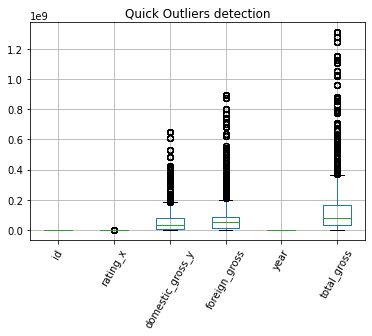

In [83]:
# Reviewing the outliers
movie_final.boxplot()
plt.title('Quick Outliers detection')
plt.xticks(rotation=60);

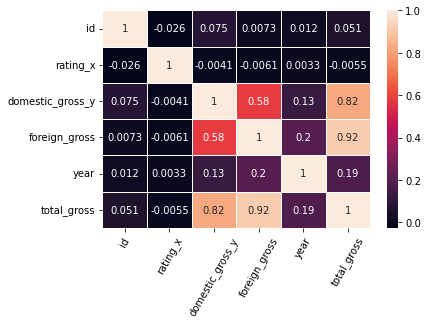

In [84]:
# Correlation view
movie_correlation = movie_final.corr(method='spearman')

# Customize the heatmap of the correlation matrix
sns.heatmap(movie_correlation,
           annot=True,
           linewidths=0.6,
           annot_kws={'size': 10});

plt.xticks(rotation=60);
plt.yticks(rotation=0);

#### Graphical representaion of top genres

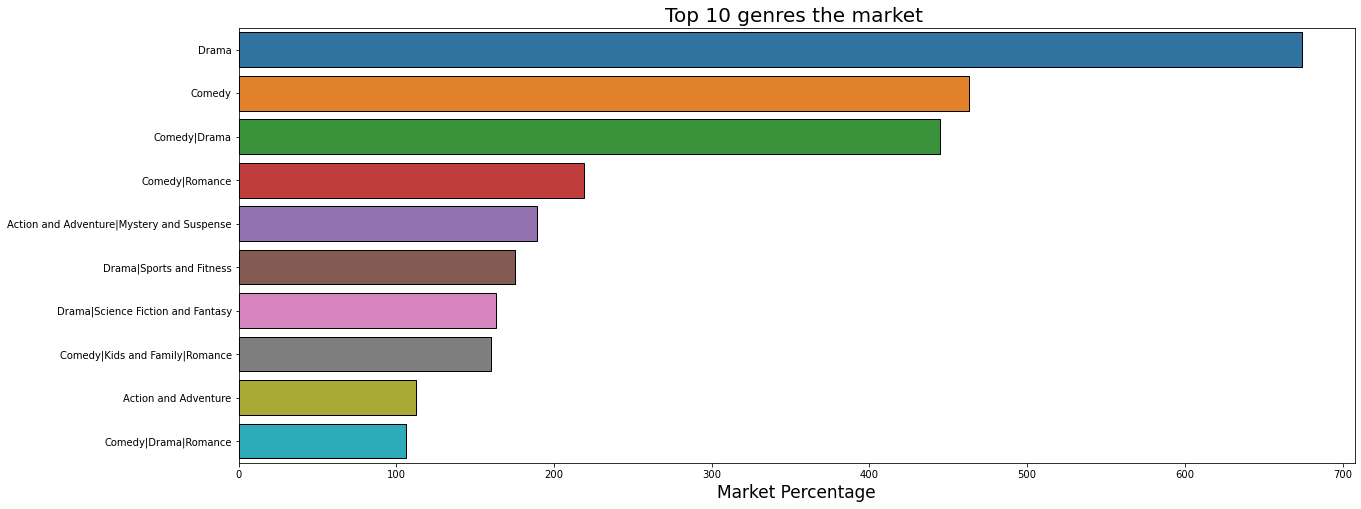

In [100]:
# Calculating the top 10 genres
genre = movie_final["genre"].value_counts()
top_genre = genre.iloc[:10]

#Calculating the top 10 genres in percentage
top_percent=(top_genre/len(top_genre))

fig, ax = plt.subplots(figsize=(20,8))
bar_chart_title = "Top 10 genres the market "

# plotting 
sns.barplot(x=top_percent, y=top_genre.index, edgecolor = "black")
# labeling the axes 
plt.xlabel("Market Percentage", fontsize = 17)
plt.title(bar_chart_title, fontsize = 20)
plt.show()

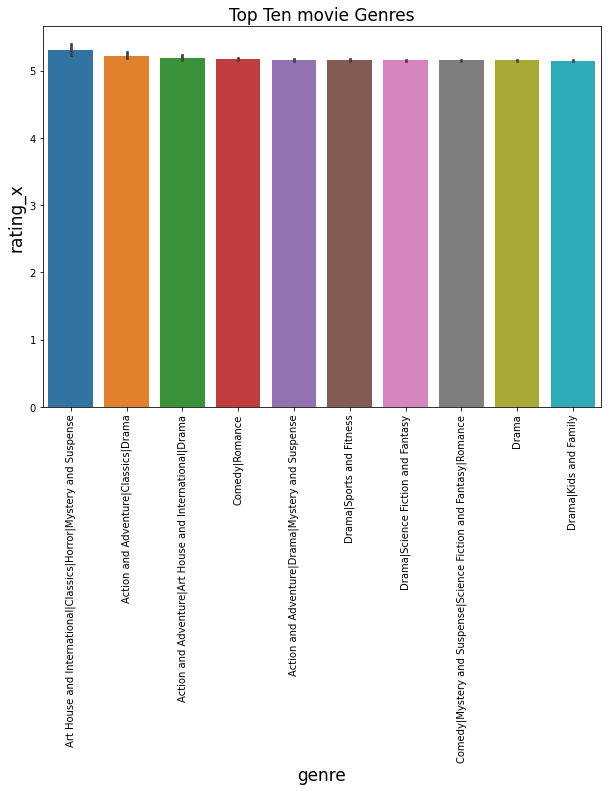

In [119]:
#lets compare the above genres against ratings
# We will start by grouping the genre and calculate mean rating_x
genre_ratings = movie_final.groupby('genre')['rating_x'].mean()

# Sort by mean rating_x and select top 10 genres
top_genres = genre_ratings.sort_values(ascending=False)[:10]

# Filter the dataframe to only include the top 10 genres
movie_final_top10 = movie_final[movie_final['genre'].isin(top_genres.index)]

# Plot the top 10 genres
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=movie_final_top10['genre'],y=movie_final_top10['rating_x'], order=top_genres.index)

plt.xlabel('genre', fontsize = 17)
plt.ylabel('rating_x', fontsize = 17) 
plt.title('Top Ten movie Genres', fontsize = 17)

plt.xticks(rotation=90, fontsize = 10)
plt.show()

Number of average ratings, movies running times and votes

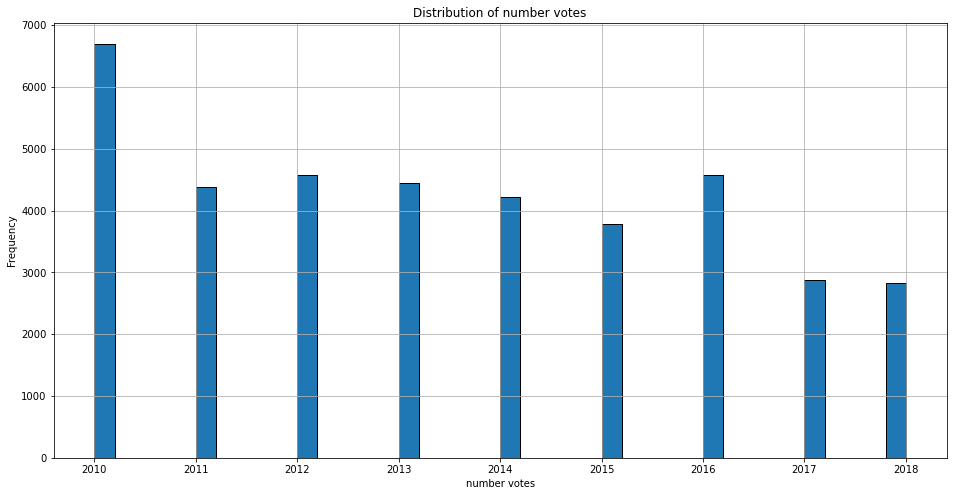

In [95]:
# graphical representation
fig, ax = plt.subplots(figsize=(16,8))

#plotting
movie_final['year'].hist(edgecolor = "black", bins=40, ax=ax)

#Lavels
ax.set_title('Distribution of number votes')
ax.set_ylabel('Frequency')
ax.set_xlabel('number votes');

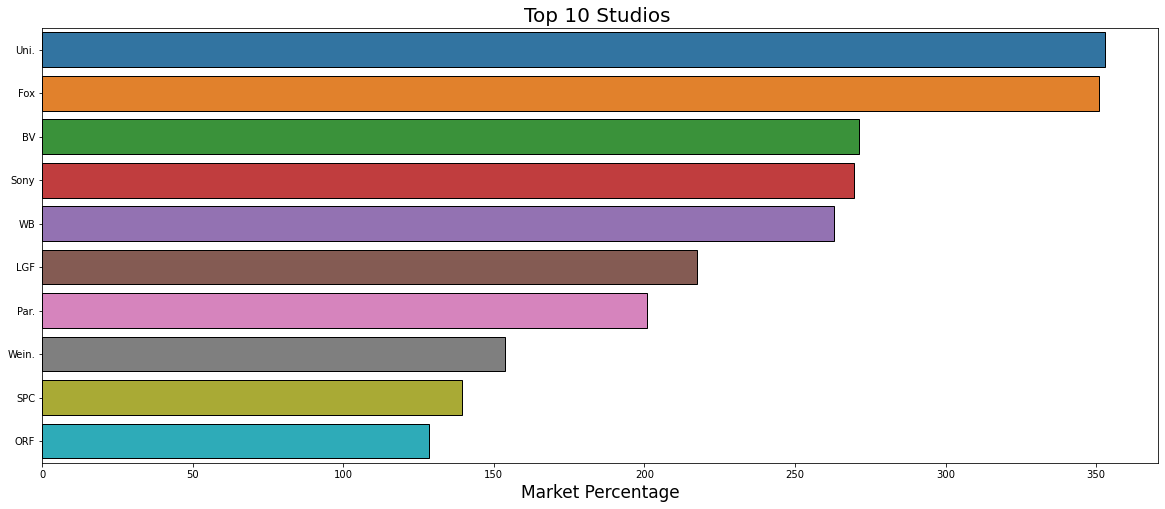

In [163]:
# Calculating the top 10 studios
studios = movie_final["studio"].value_counts()
top_studios = studios.iloc[:10]

#Calculating the top 10 studios in percentage
top_percent=(top_studios/len(top_studios))

fig, ax = plt.subplots(figsize=(20,8))
bar_chart_title = "Top 10 Studios "

# plotting 
sns.barplot(x=top_percent, y=top_studios.index, edgecolor = "black")
# labeling the axes 
plt.xlabel("Market Percentage", fontsize = 17)
plt.title(bar_chart_title, fontsize = 20)
plt.show()

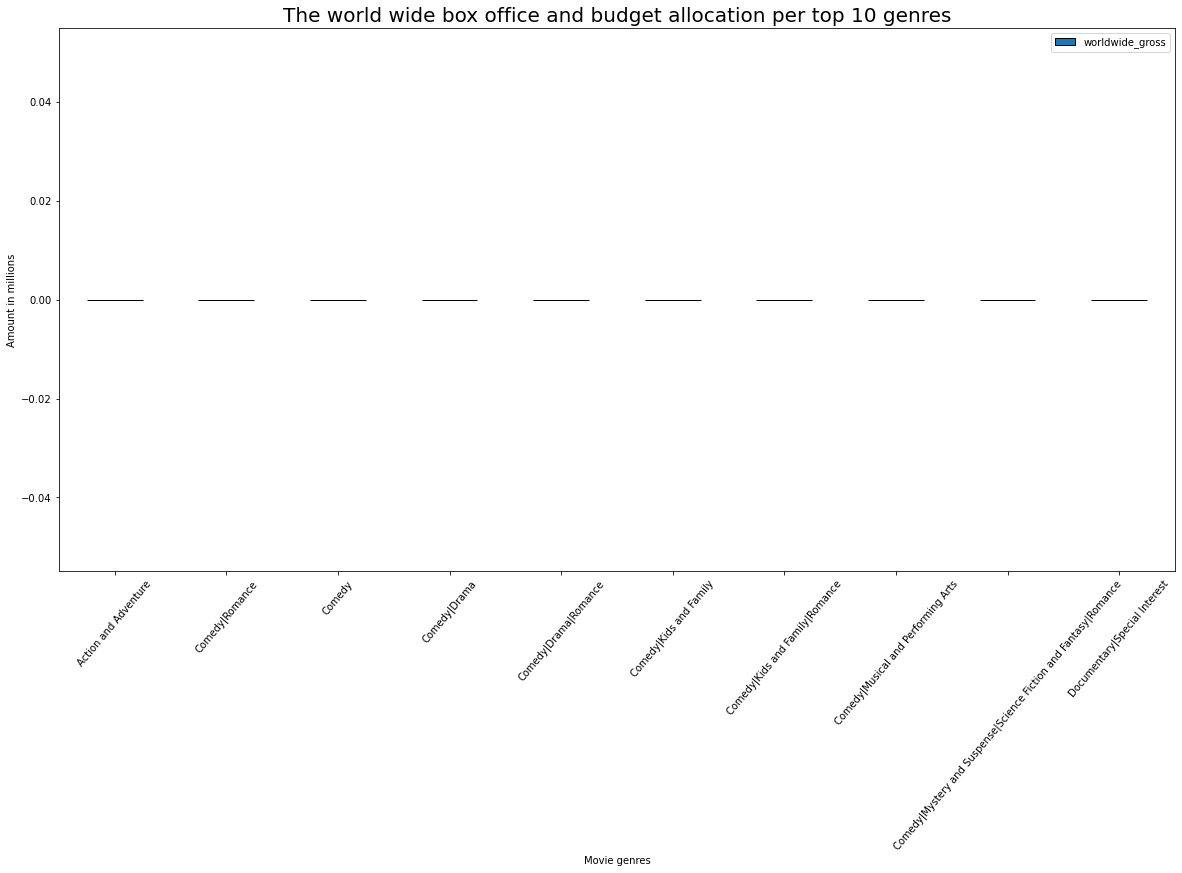

In [126]:
# calculate total worldwide gross and budget allocation for each genre
genre_data = movie_final.groupby('genre')[['worldwide_gross', 'production_budget']].sum()

# sort by descending order of gross and select top 10 genres
top10_genres = genre_data.sort_values(by='worldwide_gross', ascending=False).head(10)

# graphical representation
fig, ax = plt.subplots(figsize=(20,10))

#Plotting
top10_genres.plot(kind = 'bar', ax=ax, edgecolor = "black")

#Labels
ax.set_title('The world wide box office and budget allocation per top 10 genres',fontsize = 20)
ax.set_xlabel('Movie genres')
ax.set_ylabel('Amount in millions')

#Rotation
plt.xticks(rotation=50);

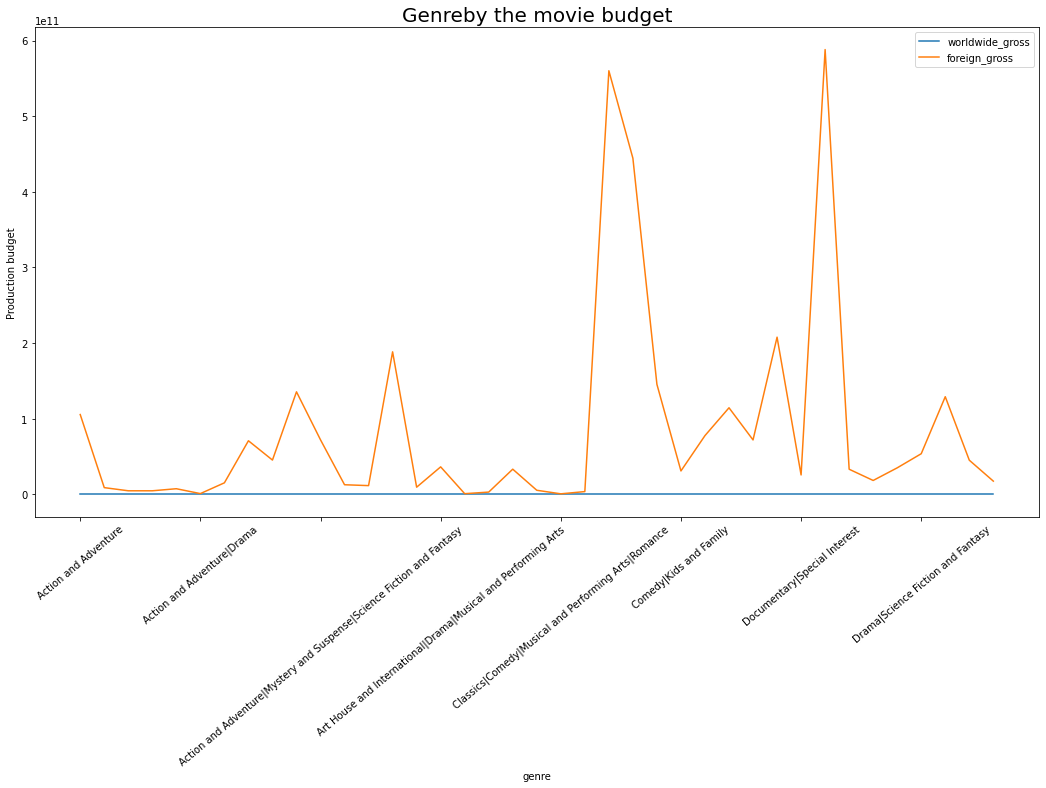

In [162]:
fig, ax = plt.subplots(figsize=(18,9))

#Plotting
movie_final.groupby('genre')[['worldwide_gross', 'foreign_gross', 'production_budget']].sum().plot(kind = 'line', ax=ax)

#Labels
ax.set_title('Genreby the movie budget', fontsize = 20)
ax.set_xlabel('genre')
ax.set_ylabel('Production budget')

#Rotation
plt.xticks(rotation=40);

In [141]:
top10_genres[['worldwide_gross', 'production_budget']].info()

KeyError: "['production_budget'] not in index"

In [149]:
# Counting the number of movie produced by year
years = movie_final["year"].value_counts()
years.describe();
years


2010    6702
2016    4578
2012    4578
2013    4444
2011    4375
2014    4213
2015    3777
2017    2884
2018    2833
Name: year, dtype: int64

In [150]:
#Statistical summary of the number of movie produced by year
years.describe()

count       9.000000
mean     4264.888889
std      1138.951321
min      2833.000000
25%      3777.000000
50%      4375.000000
75%      4578.000000
max      6702.000000
Name: year, dtype: float64

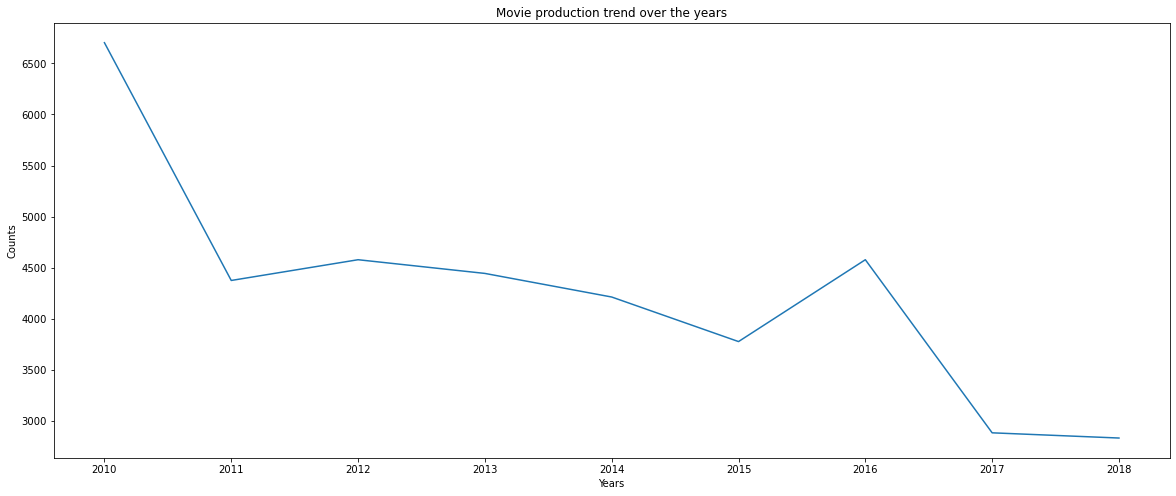

In [164]:
# graphical representation
fig, ax = plt.subplots(figsize=(20,8))

#Plotting
sns.lineplot(x = years.index , y = years)

#Labels
plt.xlabel("Years")
plt.ylabel("Counts")
plt.title("Movie production trend over the years")
plt.show();

Budgeting received for the movie tite over the years

In [153]:
# Counting the budget by year
years_budget= movie_final.groupby('year')[['production_budget']].sum()
years_budget

,production_budget
year,
2010,"$4,900,000$4,900,000$4,900,000$4,900,000$4,900..."
2011,"$85,000,000$85,000,000$85,000,000$85,000,000$8..."
2012,"$20,000,000$20,000,000$20,000,000$20,000,000$2..."
2013,"$15,000,000$15,000,000$15,000,000$15,000,000$1..."
2014,"$20,000,000$20,000,000$20,000,000$20,000,000$2..."
2015,"$37,000,000$37,000,000$37,000,000$37,000,000$3..."
2016,"$22,500,000$22,500,000$22,500,000$22,500,000$2..."
2017,"$175,000,000$175,000,000$175,000,000$175,000,0..."
2018,"$30,000,000$30,000,000$30,000,000$30,000,000$3..."


## Conclusion

1. We looked at the top genres to understand which ones Microsoft should focus on. The Drama, Comedy and Comedy/ Drama categories are the top 3. 
2. We analysed the top 10 studios to understand the competitive landscape of the industry and to guide on who to be on the look out for. The main ones to keep track of are Universal Studio, Fox, BV and Sony as the top four. 
3. We observed that movie production has been on the decline over the years, from 2010 to 2018 


## Recommendation

1. In terms of trends on  audience preference, we recommend that Microsoft should focus their production on the top 10 categories to start with. 
2. We highly recommend that Microsoft keeps track of the top 10 studios, its main competitors. They can also consider forming relationships with then to collaborate and access data, analytics, trends, and new resources that can be mutually beneficial. By working together, both companies can identify new sales opportunities, promote cross-selling, coordinate marketing promotions, and strengthen their presence in the movie industry."
3. Microsoft should invest in further research to understand the reason for the decline of the movies over the years. 
4. There is also need for microsoft to further analyse the impact of the the budgets allocated to the performance of the movies, and the genres that tend to get bigger budgets and how exactly movie ratings affect or influence the performance of movies in terms of grossing. 